In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel('../data/BDI3 All Evals for NSS 11-2023.xlsx')

In [3]:
location_groups = {
    'East Tennessee': 'East',
    'First Tennessee': 'East',
    'Southeast Tennessee': 'East',
    'Greater Nashville': 'Middle TN',
    'Upper Cumberland': 'Middle TN',
    'South Central': 'Middle TN',
    'Northwest': 'West',
    'Southwest': 'West',
    'Memphis Delta': 'West'
}


dataset['Location Group'] = dataset['Location - Sub Level 1'].map(location_groups)


dataset['Location Group'].fillna('Other', inplace=True)

In [4]:
dataset.columns = dataset.columns.str.replace(' ', '_')

In [5]:
dataset.columns = dataset.columns.str.replace('-', '_')

In [6]:
dataset.columns = dataset.columns.str.replace('__', '_')

In [7]:
location_check = ['Location__Sub_Level_1']

In [8]:
check_columns = ['Adaptive_Sum_of_Scaled_Scores', 'Social_Emotional_Sum_of_Scaled_Scores', 'Communication_Sum_of_Scaled_Scores', 'Motor_Sum_of_Scaled_Scores', 'Cognitive_Sum_of_Scaled_Scores']

In [9]:
dataset.dropna(subset=check_columns, how='all', inplace=True)

In [10]:
# filter for all PR columns
pr_columns = [col for col in dataset.columns if 'PR' in col]


for col in pr_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')


location_grouped_data = dataset.groupby('Location_Group')


pr_stats = {col: location_grouped_data[col].agg(['mean', 'median', 'std', 'count', 'min', 'max']) for col in pr_columns}


for col, stats in pr_stats.items():
    print(f"Statistics for {col}:\n", stats, "\n")

Statistics for Adaptive_Self_Care_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            30.128285    25.0  24.909779   6127  1.0  99.0
Middle TN       29.599756    25.0  24.994755   7383  1.0  99.0
Other           34.820513    31.0  28.435273     78  1.0  95.0
West            30.855980    25.0  25.947653   4423  1.0  99.0 

Statistics for Adaptive_Personal_Responsibility_PR:
                      mean  median        std  count  min   max
Location_Group                                                
East            33.909190    25.0  28.008053   2753  1.0  99.0
Middle TN       40.886159    37.0  31.399522   3663  1.0  99.0
Other           63.850000    75.0  34.148144     60  1.0  99.0
West            38.977138    37.0  29.787467   2187  1.0  99.0 

Statistics for Social_Emotional_Adult_Interaction_PR:
                      mean  median        std  count  min   max
Location_Group                

In [11]:
dataset['TEST_DATE'] = dataset['Adaptive_Self_Care_Date_of_Testing']

In [12]:
dataset['AGE_AT_TEST_YEARS'] = (dataset['TEST_DATE'].dt.year - dataset['Date_of_Birth'].dt.year)

In [13]:
dataset_clean = dataset

In [ ]:
dataset_clean['Adaptive_PR'] = dataset_clean['Adaptive_Percentile_Rank']
dataset_clean['Social_Emotional_PR'] = dataset_clean['Social_Emotional_Percentile_Rank']
dataset_clean['Communication_PR'] = dataset_clean['Communication_Percentile_Rank']
dataset_clean['Motor_PR'] = dataset_clean['Motor_Percentile_Rank']
dataset_clean['Cognitive_PR'] = dataset_clean['Cognitive_Percentile_Rank']

In [17]:
percentile_columns = ['Adaptive_Percentile_Rank','Social_Emotional_Percentile_Rank','Communication_Percentile_Rank','Motor_Percentile_Rank','Cognitive_Percentile_Rank']

In [ ]:
dataset_clean[percentile_columns] = dataset_clean[percentile_columns].replace('<0.1', '0.1')

In [14]:
dataset_clean['Adaptive_Percentile_Rank'] = dataset_clean['Adaptive_Percentile_Rank'].replace('<0.1', '0.1')
dataset_clean['Social_Emotional_Percentile_Rank'] = dataset_clean['Social_Emotional_Percentile_Rank'].replace('<0.1', '0.1')
dataset_clean['Communication_Percentile_Rank'] = dataset_clean['Communication_Percentile_Rank'].replace('<0.1', '0.1')
dataset_clean['Motor_Percentile_Rank'] = dataset_clean['Motor_Percentile_Rank'].replace('<0.1', '0.1')
dataset_clean['Cognitive_Percentile_Rank'] = dataset_clean['Cognitive_Percentile_Rank'].replace('<0.1', '0.1')

In [15]:
dataset_clean_eligibility = dataset_clean[dataset_clean["Program_Label"] == 'BDI-3 Eligibility Evaluation']

In [18]:
dataset_clean_eligibility.groupby('Location_Group')[percentile_columns].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [20]:
dataset_clean['Communication_Percentile_Rank'].unique()

array([27, 42, 12, 21, 2, 16, 4, 50, '0.1', 5, 0.3, 0.1, 34, 1, 58, 84, 8,
       79, 88, 66, 95, 73, '>99.9', 96, 92, 98, 99, 99.5, 99.9, nan, 99.7],
      dtype=object)

In [21]:
dataset_clean_eligibility[percentile_columns] = dataset_clean_eligibility[percentile_columns].apply(pd.to_numeric, errors='coerce')

/var/folders/73/8ylhfl6151q5ccx79mch6ddc0000gn/T/ipykernel_17609/120496176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean_eligibility[percentile_columns] = dataset_clean_eligibility[percentile_columns].apply(pd.to_numeric, errors='coerce')


In [40]:
pr_by_region = dataset_clean_eligibility.groupby('Location_Group')[percentile_columns].mean().reset_index()
pr_by_region

,Location_Group,Adaptive_Percentile_Rank,Social_Emotional_Percentile_Rank,Communication_Percentile_Rank,Motor_Percentile_Rank,Cognitive_Percentile_Rank
0,East,31.071587,38.641734,24.798738,43.295641,36.158367
1,Middle TN,31.517061,40.871186,20.430411,42.772248,32.287722
2,Other,46.166667,44.183333,8.025000,27.750000,33.550000
3,West,33.943533,49.182707,23.726475,48.371451,35.567066


In [69]:
pr_by_region2_data = {'Region' : ['East','East','East','East','East','Middle TN','Middle TN','Middle TN','Middle TN','Middle TN','Other','Other','Other','Other','Other','West','West','West','West','West'],
                 'Domain' : ['Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive'],
                 'Percentile Rank' : [31.071587,38.641734,24.798738,43.295641,36.158367,31.517061,40.871186,20.430411,42.772248,32.287722,46.166667,44.183333,8.025000,27.750000,33.550000,33.943533,49.182707,23.726475,48.371451,35.567066]}

In [70]:
pr_by_region2 = pd.DataFrame(pr_by_region2_data)
pr_by_region2

,Region,Domain,Percentile Rank
0,East,Adaptive,31.071587
1,East,Social Emotional,38.641734
2,East,Communication,24.798738
3,East,Motor,43.295641
4,East,Cognitive,36.158367
5,Middle TN,Adaptive,31.517061
6,Middle TN,Social Emotional,40.871186
7,Middle TN,Communication,20.430411
8,Middle TN,Motor,42.772248
9,Middle TN,Cognitive,32.287722


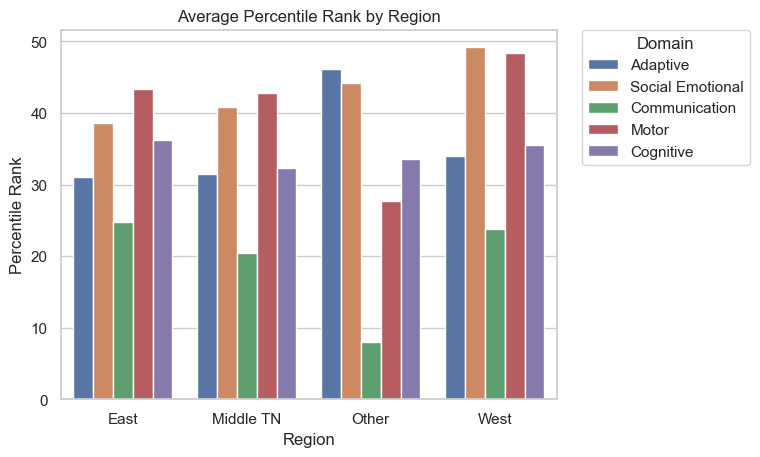

In [97]:
sns.barplot(hue='Domain',y='Percentile Rank',x='Region',data=pr_by_region2)
plt.title("Average Percentile Rank by Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title = 'Domain')

In [41]:
pr_by_subregion = dataset_clean_eligibility.groupby('Location__Sub_Level_1')[percentile_columns].mean().reset_index()
pr_by_subregion

,Location__Sub_Level_1,Adaptive_Percentile_Rank,Social_Emotional_Percentile_Rank,Communication_Percentile_Rank,Motor_Percentile_Rank,Cognitive_Percentile_Rank
0,East Tennessee,31.484654,37.735285,25.060979,43.270888,35.096214
1,First Tennessee,28.577593,33.553950,25.531733,41.727622,35.414241
2,Greater Nashville,32.691719,46.406488,22.237369,45.240411,36.962353
3,Memphis Delta,29.713649,46.091690,20.675606,45.056192,33.208090
4,Northwest,40.317810,54.963889,29.370588,52.441667,40.340033
5,South Central,30.815045,36.141885,17.701134,39.607339,27.237851
6,Southeast Tennessee,32.618829,45.168683,23.605664,44.818164,38.909561
7,Southwest,39.051012,51.991216,26.541835,53.139136,37.409447
8,Upper Cumberland,30.126320,36.351109,20.650639,42.280136,29.984072


In [74]:
pr_by_subregion_data = {'Subregion' : ['East Tennessee','East Tennessee','East Tennessee','East Tennessee','East Tennessee','First Tennessee','First Tennessee','First Tennessee','First Tennessee','First Tennessee','Greater Nashville','Greater Nashville','Greater Nashville','Greater Nashville','Greater Nashville','Memphis Delta','Memphis Delta','Memphis Delta','Memphis Delta','Memphis Delta','Northwest','Northwest','Northwest','Northwest','Northwest','South Central','South Central','South Central','South Central','South Central','Southeast Tennessee','Southeast Tennessee','Southeast Tennessee','Southeast Tennessee','Southeast Tennessee','Southwest','Southwest','Southwest','Southwest','Southwest','Upper Cumberland','Upper Cumberland','Upper Cumberland','Upper Cumberland','Upper Cumberland'],
                        'Domain' : ['Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive'],
                        'Percentile Rank' : [31.484654,37.735285,25.060979,43.270888,35.096214,28.577593,33.553950,25.531733,41.727622,35.414241,32.691719,46.406488,22.237369,45.240411,36.962353,29.713649,46.091690,20.675606,45.056192,33.208090,40.317810,54.963889,29.370588,52.441667,40.340033,30.815045,36.141885,17.701134,39.607339,27.237851,32.618829,45.168683,23.605664,44.818164,38.909561,39.051012,51.991216,26.541835,53.139136,37.409447,30.126320,36.351109,20.650639,42.280136,29.984072]}

In [77]:
pr_by_subregion2 = pd.DataFrame(pr_by_subregion_data)
pr_by_subregion2

,Subregion,Domain,Percentile Rank
0,East Tennessee,Adaptive,31.484654
1,East Tennessee,Social Emotional,37.735285
2,East Tennessee,Communication,25.060979
3,East Tennessee,Motor,43.270888
4,East Tennessee,Cognitive,35.096214
5,First Tennessee,Adaptive,28.577593
6,First Tennessee,Social Emotional,33.553950
7,First Tennessee,Communication,25.531733
8,First Tennessee,Motor,41.727622
9,First Tennessee,Cognitive,35.414241


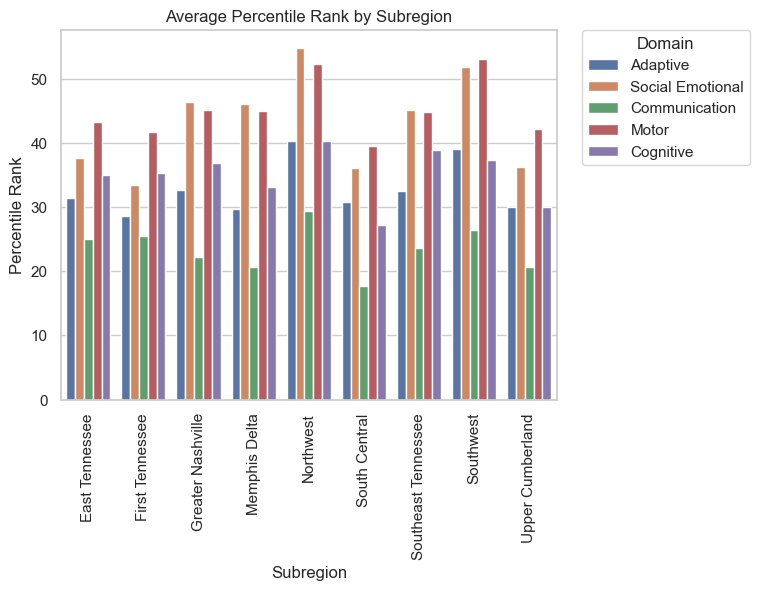

In [96]:
sns.barplot(hue='Domain',y='Percentile Rank',x='Subregion',data=pr_by_subregion2)
plt.title("Average Percentile Rank by Subregion")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title = 'Domain')

In [27]:
dq_columns = ['Adaptive_Developmental_Quotient','Social_Emotional_Developmental_Quotient','Communication_Developmental_Quotient','Motor_Developmental_Quotient','Cognitive_Developmental_Quotient']

In [44]:
dq_by_region_age = dataset_clean_eligibility.groupby(['AGE_AT_TEST_YEARS','Location_Group'])[dq_columns].mean()
dq_by_region_age

Adaptive_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                    
0.0               East                                  92.456724   
                  Middle TN                             93.703939   
                  West                                  96.505906   
1.0               East                                  90.383683   
                  Middle TN                             90.068120   
                  Other                                125.000000   
                  West                                  92.563510   
2.0               East                                  86.398974   
                  Middle TN                             88.426754   
                  Other                                 87.500000   
                  West                                  88.131559   
3.0               East                                  84.196682   
                  Middle TN                             83.170213   
                  West                                  85.598753   

                                  Social_Emotional_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                            
0.0               East                                          94.876000   
                  Middle TN                                     96.504447   
                  West                                         101.228346   
1.0               East                                          97.746968   
                  Middle TN                                     99.683243   
                  Other                                        115.000000   
                  West                                         103.412240   
2.0               East                                          90.648909   
                  Middle TN                                     92.442105   
                  Other                                         83.500000   
                  West                                          97.711027   
3.0               East                                          89.682464   
                  Middle TN                                     89.184659   
                  West                                          92.760915   

                                  Communication_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                         
0.0               East                                       98.465863   
                  Middle TN                                  96.403061   
                  West                                      102.449704   
1.0               East                                       87.033981   
                  Middle TN                                  85.660982   
                  Other                                            NaN   
                  West                                       87.560046   
2.0               East                                       74.130295   
                  Middle TN                                  72.936842   
                  Other                                      70.750000   
                  West                                       73.273764   
3.0               East                                       73.570071   
                  Middle TN                                  70.910638   
                  West                                       72.207900   

                                  Motor_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location_Group                                 
0.0               East                               97.896000   
                  Middle TN                          98.360510   
                  West                               99.875984   
1.0               East                               93.670170   
                  Middle TN                          92.699387   
                  Other                          

In [79]:
dq_by_region_age0_data = {'Region' : ['East','East','East','East','East','Middle TN','Middle TN','Middle TN','Middle TN','Middle TN','West','West','West','West','West'],
                          'Domain' : ['Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive'],
                          'Developmental Quotient' : [92.456724,94.876000,98.465863,97.896000,96.518024,93.703939,96.504447,96.403061,98.360510,96.061146,96.505906,101.228346,102.449704,99.875984,100.055118]}

In [80]:
dq_by_region_age0 = pd.DataFrame(dq_by_region_age0_data)
dq_by_region_age0

,Region,Domain,Developmental Quotient
0,East,Adaptive,92.456724
1,East,Social Emotional,94.876000
2,East,Communication,98.465863
3,East,Motor,97.896000
4,East,Cognitive,96.518024
5,Middle TN,Adaptive,93.703939
6,Middle TN,Social Emotional,96.504447
7,Middle TN,Communication,96.403061
8,Middle TN,Motor,98.360510
9,Middle TN,Cognitive,96.061146


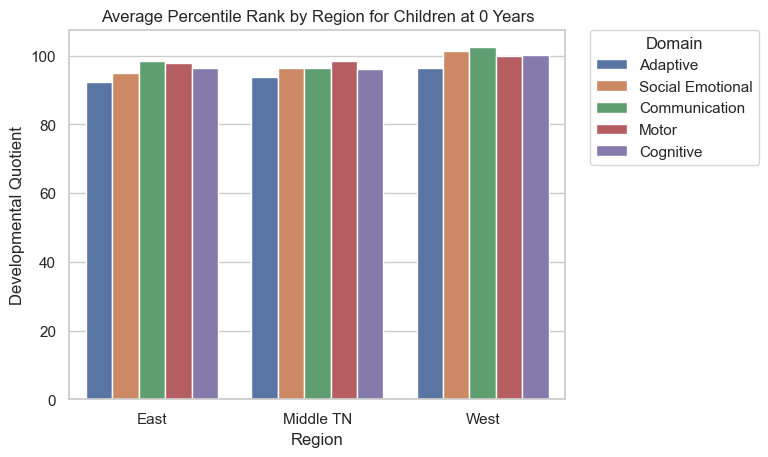

In [95]:
sns.barplot(hue='Domain',y='Developmental Quotient',x='Region',data=dq_by_region_age0)
plt.title("Average Percentile Rank by Region for Children at 0 Years")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Domain')

In [84]:
dq_by_subregion_age0_data = {'Subregion' : ['East Tennessee','East Tennessee','East Tennessee','East Tennessee','East Tennessee','First Tennessee','First Tennessee','First Tennessee','First Tennessee','First Tennessee','Greater Nashville','Greater Nashville','Greater Nashville','Greater Nashville','Greater Nashville','Memphis Delta','Memphis Delta','Memphis Delta','Memphis Delta','Memphis Delta','Northwest','Northwest','Northwest','Northwest','Northwest','South Central','South Central','South Central','South Central','South Central','Southeast Tennessee','Southeast Tennessee','Southeast Tennessee','Southeast Tennessee','Southeast Tennessee','Southwest','Southwest','Southwest','Southwest','Southwest','Upper Cumberland','Upper Cumberland','Upper Cumberland','Upper Cumberland','Upper Cumberland'],
                             'Domain' : ['Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive','Adaptive','Social Emotional','Communication','Motor','Cognitive'],
                             'Developmental Quotient' : [92.373134,94.555224,98.719403,97.528358,95.131343,93.174274,91.812500,98.151899,98.187500,96.610879,95.873494,99.430723,100.472727,99.691843,101.296970,94.260000,99.916000,101.626506,97.408000,97.164000,99.051095,103.788321,105.211679,103.635036,104.751825,92.291667,91.450000,90.725000,96.225000,88.758333,91.628571,99.691429,98.405714,98.200000,99.045714,98.264463,101.041322,101.016529,100.719008,100.710744,91.930233,97.627907,96.495327,98.696262,96.176744]}

In [85]:
dq_by_subregion_age0 = pd.DataFrame(dq_by_subregion_age0_data)
dq_by_subregion_age0

,Subregion,Domain,Developmental Quotient
0,East Tennessee,Adaptive,92.373134
1,East Tennessee,Social Emotional,94.555224
2,East Tennessee,Communication,98.719403
3,East Tennessee,Motor,97.528358
4,East Tennessee,Cognitive,95.131343
5,First Tennessee,Adaptive,93.174274
6,First Tennessee,Social Emotional,91.812500
7,First Tennessee,Communication,98.151899
8,First Tennessee,Motor,98.187500
9,First Tennessee,Cognitive,96.610879


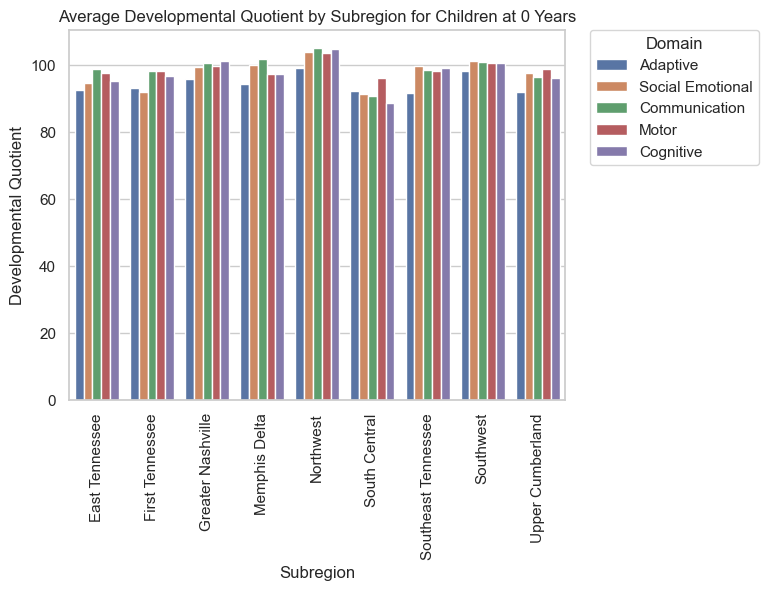

In [92]:
sns.barplot(hue='Domain',y='Developmental Quotient',x='Subregion',data=dq_by_subregion_age0)
plt.title("Average Developmental Quotient by Subregion for Children at 0 Years")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Domain')

In [45]:
dq_by_subregion_age = dataset_clean_eligibility.groupby(['AGE_AT_TEST_YEARS','Location__Sub_Level_1'])[dq_columns].mean()
dq_by_subregion_age

Adaptive_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location__Sub_Level_1                                    
0.0               East Tennessee                               92.373134   
                  First Tennessee                              93.174274   
                  Greater Nashville                            95.873494   
                  Memphis Delta                                94.260000   
                  Northwest                                    99.051095   
                  South Central                                92.291667   
                  Southeast Tennessee                          91.628571   
                  Southwest                                    98.264463   
                  Upper Cumberland                             91.930233   
1.0               East Tennessee                               91.387597   
                  First Tennessee                              87.728873   
                  Greater Nashville                            91.216617   
                  Memphis Delta                                90.336842   
                  Northwest                                    94.668675   
                  South Central                                89.432071   
                  Southeast Tennessee                          90.728155   
                  Southwest                                    95.711111   
                  Upper Cumberland                             88.652174   
2.0               East Tennessee                               86.669554   
                  First Tennessee                              83.751462   
                  Greater Nashville                            89.209913   
                  Memphis Delta                                86.436528   
                  Northwest                                    90.095618   
                  South Central                                87.788387   
                  Southeast Tennessee                          88.078240   
                  Southwest                                    90.924658   
                  Upper Cumberland                             87.773109   
3.0               East Tennessee                               83.476684   
                  First Tennessee                              80.329897   
                  Greater Nashville                            83.896067   
                  Memphis Delta                                83.275000   
                  Northwest                                    91.724138   
                  South Central                                82.042654   
                  Southeast Tennessee                          88.090909   
                  Southwest                                    89.368932   
                  Upper Cumberland                             83.021739   

                                         Social_Emotional_Developmental_Quotient  \
AGE_AT_TEST_YEARS Location__Sub_Level_1                                            
0.0               East Tennessee                                       94.555224   
                  First Tennessee                                      91.812500   
                  Greater Nashville                                    99.430723   
                  Memphis Delta                                        99.916000   
                  Northwest                                           103.788321   
                  South Central                                        91.450000   
                  Southeast Tennessee                                  99.691429   
                  Southwest                                           101.041322   
                  Upper Cumberland                                     97.627907   
1.0               East Tennessee                                       97.483721   
                  First Tennessee                                      94.530035   
                  Greater Nashville                         

In [47]:
dataset_clean

,Child_ID,Gender,Date_of_Birth,Location__Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Code_4,Code_5,Code_6,Code_7,Code_8,Code_9,Code_10,Location_Group,TEST_DATE,AGE_AT_TEST_YEARS
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,2023-06-23,1.0
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle TN,2023-03-21,3.0
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East,2023-04-06,2.0
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East,2023-02-23,1.0
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,2023-02-24,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,2023-11-15,0.0
19496,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle TN,2023-11-13,2.0
19497,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle TN,2023-11-14,2.0
19498,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,2023-10-26,3.0
